In [1]:
import numpy as np 

from scipy.integrate import solve_ivp

from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('seaborn')

In [2]:
def f_rot(x, y): 
    return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)

In [3]:
x, y = np.linspace(-2., 2., 35), np.linspace(-2., 2., 35) 
X, Y = np.meshgrid(x, y) 

dYdX = f_rot(X, Y) 
U = (1. / (1. + dYdX**2) ** 0.5) * np.ones(Y.shape) 
V = (1. / (1. + dYdX**2) ** 0.5) * dYdX

/tmp/ipykernel_453177/3321281476.py:2: RuntimeWarning: invalid value encountered in divide
  return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)


In [4]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1], y0=[y0])

In [5]:
res = single_solve(-1)

resx, resy = res.t, res.y.flatten() 

Text(0, 0.5, 'y')

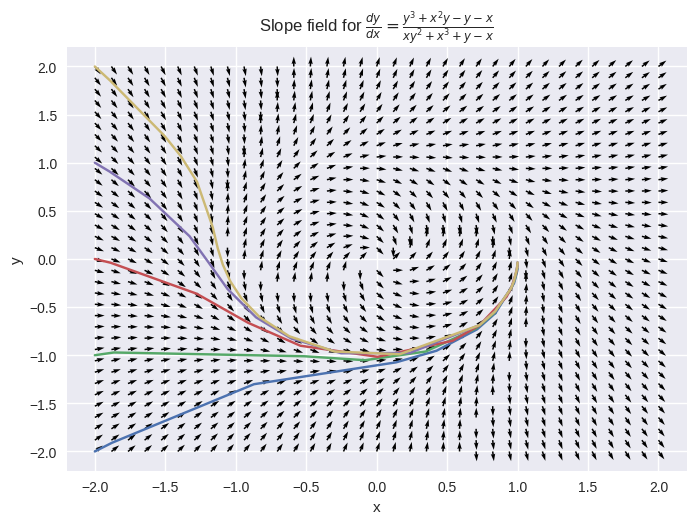

In [6]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

y0s = np.linspace(-2., 2., 5)

for y0 in y0s: 
    res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 

    plt.plot(resx, resy)

plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')

In [8]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1], y0=[y0], t_eval=np.linspace(-2., 1., 20))

y0s = [-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


Text(0, 0.5, 'y')

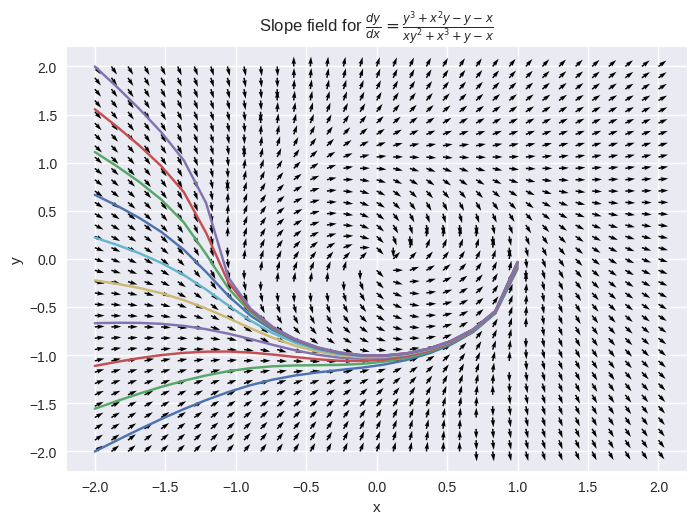

In [9]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

y0s = np.linspace(-2., 2., 10)
print(f"y0s = {y0s}")

rez = np.zeros([10, 20])
i = 0
for y0 in y0s: 
    res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 
    rez[i] = resy
    i += 1
    plt.plot(resx, resy)

np.savez("ode10x20.npz", rez)

plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')